In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
from csv import writer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Multiple pages of data(5 pages) is scraped and it gives 1000 entries

In [ ]:
with open('crypto.csv','w',encoding='utf8',newline='') as c:
        writer=csv.writer(c)
        header=['Symbol','Name','Price (Intraday)','Change','% Change','Market Cap','Volume in Currency (Since 0:00 UTC)','Volume in Currency (24Hr)','Circulating Supply']
        writer.writerow(header)
        c.close()
for i in range(0,500,100):
    url=f"https://finance.yahoo.com/crypto?offset={i}&count=200"
    response=requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
    print(response)
    soup=BeautifulSoup(response.content,'html.parser')
    results=soup.find_all('table')
    with open('crypto.csv','a',newline='') as f:
        writer1=csv.writer(f)
        for result in results:
            symbol=result.find_all('a',class_="Fw(600) C($linkColor)")
            name=result.find_all('td',class_="Va(m) Ta(start) Px(10px) Fz(s)")
            price=result.find_all('td',{"aria-label":"Price (Intraday)"})
            change=result.find_all('td',{"aria-label":"Change"})
            change_percent=result.find_all('td',{"aria-label":"% Change"})
            cap=result.find_all('td',{"aria-label":"Market Cap"})
            volume_currency=result.find_all('td',{"aria-label":"Volume in Currency (Since 0:00 UTC)"})
            volume_24hrs=result.find_all('td',{"aria-label":"Volume in Currency (24Hr)"})
            cir_supply=result.find_all('td',{"aria-label":"Circulating Supply"})
            for i in range(0,len(name)):
                data=[symbol[i].text,name[i].text,price[i].text,change[i].text,change_percent[i].text,cap[i].text,volume_currency[i].text,volume_24hrs[i].text,cir_supply[i].text]
                writer1.writerow(data)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
with open('crypto.csv','r') as file:
    reader=csv.reader(file)
    for row in reader:
        print(row)
    file.close()

['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Circulating Supply']
['BTC-USD', 'Bitcoin USD', '27,338.38', '-596.65', '-2.14%', '529.081B', '19.185B', '19.185B', '19.353M']
['ETH-USD', 'Ethereum USD', '1,855.18', '-56.19', '-2.94%', '223.389B', '10.906B', '10.906B', '120.414M']
['USDT-USD', 'Tether USD', '1.0004', '+0.0002', '+0.02%', '81.451B', '31.458B', '31.458B', '81.422B']
['BNB-USD', 'BNB USD', '322.91', '+5.98', '+1.89%', '50.33B', '1.037B', '1.037B', '155.865M']
['USDC-USD', 'USD Coin USD', '1.0002', '+0.0001', '+0.01%', '30.784B', '5.269B', '5.269B', '30.779B']
['XRP-USD', 'XRP USD', '0.452686', '-0.016025', '-3.42%', '23.427B', '1.222B', '1.222B', '51.751B']
['ADA-USD', 'Cardano USD', '0.386285', '-0.014877', '-3.71%', '13.438B', '388.444M', '388.444M', '34.789B']
['STETH-USD', 'Lido Staked ETH USD', '1,855.69', '-48.40', '-2.54%', '11.305B', '32.096M', '32.096M', '6.092M']
['DOG

CSV file is read as dataframe

In [ ]:
crypto=pd.read_csv('crypto.csv',sep=',',encoding='latin-1')
crypto.head()

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"27,338.38",-596.6500,-2.14%,529.081B,19.185B,19.185B,19.353M
1,ETH-USD,Ethereum USD,"1,855.18",-56.1900,-2.94%,223.389B,10.906B,10.906B,120.414M
2,USDT-USD,Tether USD,1.0004,0.0002,+0.02%,81.451B,31.458B,31.458B,81.422B
3,BNB-USD,BNB USD,322.91,5.9800,+1.89%,50.33B,1.037B,1.037B,155.865M
4,USDC-USD,USD Coin USD,1.0002,0.0001,+0.01%,30.784B,5.269B,5.269B,30.779B


In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Symbol                               1000 non-null   object 
 1   Name                                 1000 non-null   object 
 2   Price (Intraday)                     1000 non-null   object 
 3   Change                               1000 non-null   float64
 4   % Change                             1000 non-null   object 
 5   Market Cap                           1000 non-null   object 
 6   Volume in Currency (Since 0:00 UTC)  998 non-null    object 
 7   Volume in Currency (24Hr)            998 non-null    object 
 8   Circulating Supply                   1000 non-null   object 
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


In [ ]:
crypto.describe()

,Change
count,1000.000000
mean,-4.585751
std,48.093338
min,-626.160000
25%,-0.029656
50%,-0.003847
75%,-0.000099
max,5.980000


For analysing the data, We need all values as numeric.But here only the "Change" column is numeric. The below code converts the remaining columns to numeric by applying suitable techniques according to the requirement of the column.  

In [ ]:
crypto['% Change']=crypto['% Change'].replace('%','',regex=True)

In [ ]:
crypto['Change']=pd.to_numeric(crypto.Change)
crypto['% Change']=pd.to_numeric(crypto['% Change'])

In [ ]:
crypto['Price (Intraday)'] = pd.to_numeric(crypto['Price (Intraday)'].str.replace(',', ''), errors='coerce')

In [ ]:
crypto.describe()

,Price (Intraday),Change,% Change
count,1000.000000,1000.000000,1000.000000
mean,240.375686,-4.585751,-2.553570
std,2328.974999,48.093338,5.079728
min,0.000000,-626.160000,-31.220000
25%,0.048874,-0.029656,-4.530000
50%,0.293502,-0.003847,-2.750000
75%,1.217225,-0.000099,-0.997500
max,27424.520000,5.980000,58.050000


In [ ]:
crypto['Market Cap'] = crypto['Market Cap'].replace(',','',regex=True)
crypto['Volume in Currency (Since 0:00 UTC)'] = crypto['Volume in Currency (Since 0:00 UTC)'].replace(',','',regex=True)
crypto['Volume in Currency (24Hr)'] = crypto['Volume in Currency (24Hr)'].replace(',','',regex=True)
crypto['Circulating Supply'] = crypto['Circulating Supply'].replace(',','',regex=True)

In [ ]:
crypto['Market Cap']=crypto['Market Cap'].astype(str)
crypto['Volume in Currency (Since 0:00 UTC)']=crypto['Volume in Currency (Since 0:00 UTC)'].astype(str)
crypto['Volume in Currency (24Hr)']=crypto['Volume in Currency (24Hr)'].astype(str)
crypto['Circulating Supply']=crypto['Circulating Supply'].astype(str)

In [ ]:
m=['M','B','T']
list1=['Market Cap','Volume in Currency (Since 0:00 UTC)','Volume in Currency (24Hr)','Circulating Supply']
append='A'
for l in list1:
    for n in range(0,1000):
        i=crypto[l][n]
        key=i[-1:]
        if str(key) not in m:
            crypto[l][n]=i+append

C:\Users\sivas\AppData\Local\Temp\ipykernel_20892\507104838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto[l][n]=i+append


In [ ]:
crypto = crypto[crypto["Volume in Currency (Since 0:00 UTC)"].str.contains("nanA") == False]
crypto = crypto[crypto["Market Cap"].str.contains("nanA") == False]

In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Symbol                               998 non-null    object 
 1   Name                                 998 non-null    object 
 2   Price (Intraday)                     998 non-null    float64
 3   Change                               998 non-null    float64
 4   % Change                             998 non-null    float64
 5   Market Cap                           998 non-null    object 
 6   Volume in Currency (Since 0:00 UTC)  998 non-null    object 
 7   Volume in Currency (24Hr)            998 non-null    object 
 8   Circulating Supply                   998 non-null    object 
dtypes: float64(3), object(6)
memory usage: 78.0+ KB


In [ ]:
m = {'K': 3, 'M': 6, 'B': 9, 'T': 12, 'A':0}
crypto['Market Cap']=([int(float(i[:-1]) * 10 ** m[i[-1]] ) for i in crypto['Market Cap']])
crypto['Circulating Supply']=([int(float(i[:-1]) * 10 ** m[i[-1]] ) for i in crypto['Circulating Supply']])
crypto['Volume in Currency (Since 0:00 UTC)']=([int(float(i[:-1]) * 10 ** m[i[-1]] ) for i in crypto['Volume in Currency (Since 0:00 UTC)']])
crypto['Volume in Currency (24Hr)']=([int(float(i[:-1]) * 10 ** m[i[-1]] ) for i in crypto['Volume in Currency (24Hr)']])

All the columns are converted to type "numeric" successfully

In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Symbol                               998 non-null    object 
 1   Name                                 998 non-null    object 
 2   Price (Intraday)                     998 non-null    float64
 3   Change                               998 non-null    float64
 4   % Change                             998 non-null    float64
 5   Market Cap                           998 non-null    int64  
 6   Volume in Currency (Since 0:00 UTC)  998 non-null    int64  
 7   Volume in Currency (24Hr)            998 non-null    int64  
 8   Circulating Supply                   998 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 78.0+ KB


In [ ]:
crypto.describe()

,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Circulating Supply
count,998.000000,998.000000,998.000000,9.980000e+02,9.980000e+02,9.980000e+02,9.980000e+02
mean,240.855876,-4.594854,-2.547806,1.253116e+09,9.634984e+07,9.634984e+07,3.248945e+14
std,2331.285060,48.141121,5.083185,1.847014e+10,1.232728e+09,1.232728e+09,5.511650e+15
min,0.000000,-626.160000,-31.220000,0.000000e+00,8.800000e+01,8.800000e+01,0.000000e+00
25%,0.048874,-0.029126,-4.520000,4.420425e+07,1.118000e+06,1.118000e+06,7.778525e+07
50%,0.292955,-0.003818,-2.740000,8.367900e+07,4.763000e+06,4.763000e+06,3.998540e+08
75%,1.220675,-0.000098,-0.992500,2.115822e+08,1.568125e+07,1.568125e+07,1.864500e+09
max,27424.520000,5.980000,58.050000,5.290810e+11,3.145800e+10,3.145800e+10,1.151133e+17


<Axes: >

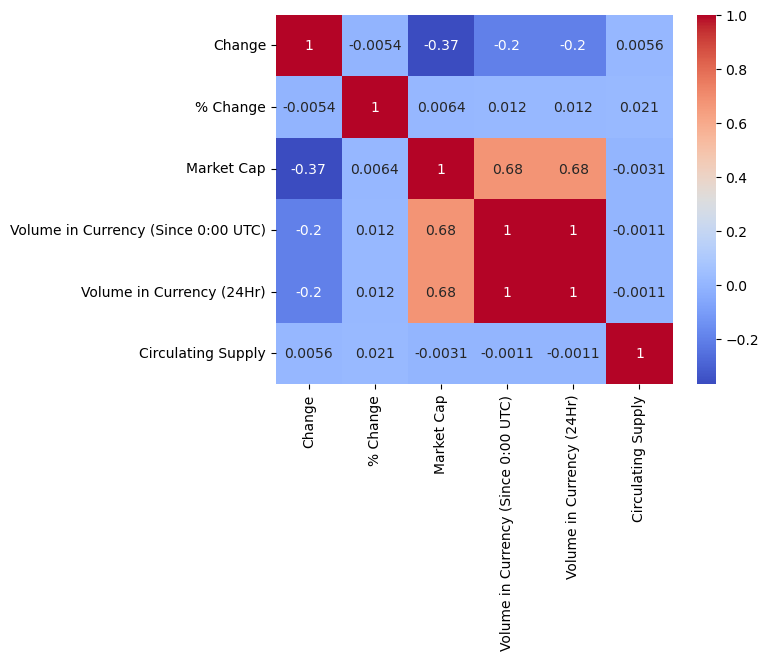

In [ ]:
sns.heatmap(crypto[['Change','% Change','Market Cap','Volume in Currency (Since 0:00 UTC)','Volume in Currency (24Hr)','Circulating Supply']].corr(),annot=True,cmap='coolwarm')

1. Analysing the Cryptocurrencies with their Market Cap, Price and their 24-Hour trading volume  

Top 10 cryptocurrencies by market cap and their corresponding price:
      Symbol                 Name    Market Cap  Price (Intraday)
0    BTC-USD          Bitcoin USD  529081000000      27338.380000
1    ETH-USD         Ethereum USD  223389000000       1855.180000
2   USDT-USD           Tether USD   81451000000          1.000400
3    BNB-USD              BNB USD   50330000000        322.910000
4   USDC-USD         USD Coin USD   30784000000          1.000200
5    XRP-USD              XRP USD   23427000000          0.452686
6    ADA-USD          Cardano USD   13438000000          0.386285
7  STETH-USD  Lido Staked ETH USD   11305000000       1855.690000
8   DOGE-USD         Dogecoin USD   10995000000          0.079082
9    HEX-USD              HEX USD   10264000000          0.059189
Cryptocurrency with the highest 24-hour trading volume:
     Symbol        Name  Volume in Currency (24Hr)
2  USDT-USD  Tether USD                31458000000
Cryptocurrency with the lowest 24-hour trading 

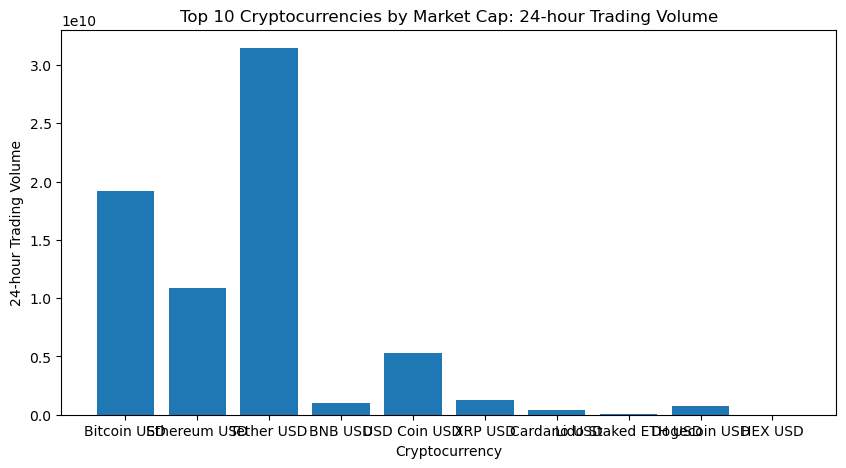

In [ ]:
top_10_market_cap = crypto.nlargest(10, 'Market Cap')
print("Top 10 cryptocurrencies by market cap and their corresponding price:")
print(top_10_market_cap[['Symbol', 'Name', 'Market Cap', 'Price (Intraday)']])
highest_volume_crypto = crypto.nlargest(1, 'Volume in Currency (24Hr)')
lowest_volume_crypto = crypto.nsmallest(1, 'Volume in Currency (24Hr)')
print("Cryptocurrency with the highest 24-hour trading volume:")
print(highest_volume_crypto[['Symbol', 'Name', 'Volume in Currency (24Hr)']])
print("Cryptocurrency with the lowest 24-hour trading volume:")
print(lowest_volume_crypto[['Symbol', 'Name', 'Volume in Currency (24Hr)']])
top_10_market_cap = crypto.nlargest(10, 'Market Cap')
plt.figure(figsize=(10, 5))
plt.bar(top_10_market_cap['Name'], top_10_market_cap['Volume in Currency (24Hr)'])
plt.xlabel('Cryptocurrency')
plt.ylabel('24-hour Trading Volume')
plt.title('Top 10 Cryptocurrencies by Market Cap: 24-hour Trading Volume')
plt.show()

2. Checking if there is correlation between Price of a Cryptocurrency and its Market Cap

The correlation coefficient is 0.34473870766857195


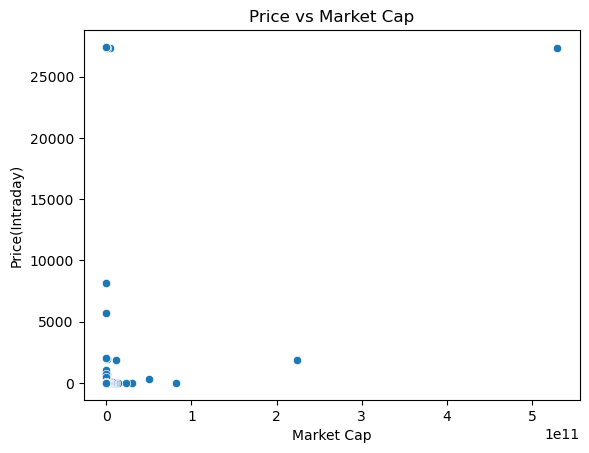

In [ ]:
price=crypto['Price (Intraday)']
market_cap=crypto['Market Cap']
corr_coeff=price.corr(market_cap)
print("The correlation coefficient is", corr_coeff)
sns.scatterplot(x=market_cap,y=price)
plt.xlabel('Market Cap')
plt.ylabel('Price(Intraday)')
plt.title('Price vs Market Cap')
plt.show()

3. Finding Average trading volume for each Cryptocurrency and checking for outliers using Scatterplot()

The mean of volume of currency is  Name
0x Protocol USD      24528000.0
1inch Network USD    26675000.0
ABBC Coin USD        21887000.0
AIOZ Network USD       267598.0
APENFT USD           11627000.0
                        ...    
smARTOFGIVING USD       86883.0
ssv.network USD      31218000.0
tomiNet USD          12813000.0
yearn.finance USD    63028000.0
Æternity USD           552930.0
Name: Volume in Currency (24Hr), Length: 599, dtype: float64


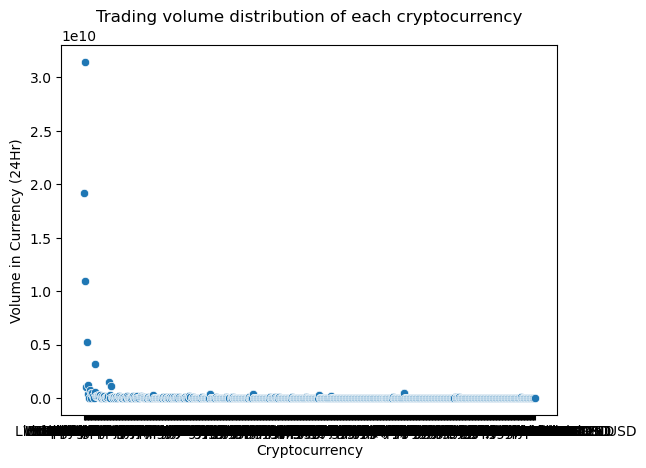

In [ ]:
crypto_names=crypto['Name']
volume=crypto['Volume in Currency (24Hr)']
mean_volume=volume.groupby(crypto_names).mean()
print("The mean of volume of currency is ",mean_volume)
sns.scatterplot(x=crypto_names,y=volume)
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume in Currency (24Hr)')
plt.title('Trading volume distribution of each cryptocurrency')
plt.show()

4. Comparison between highest % change of cryptocurrency and the overall % change.The distribution of the % change in price for all cryptocurrencies with histogram diagram

The highest % change is 550 for AVINOC USD
The overall % change is -2.5478056112224445


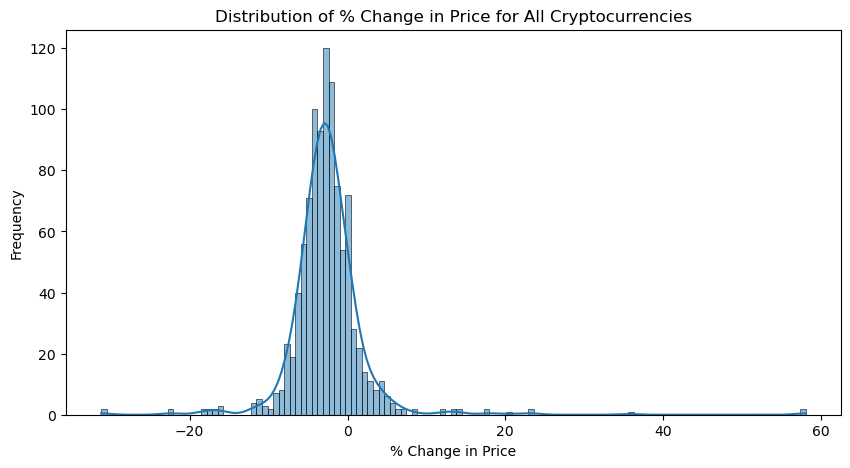

In [ ]:
crypto_names=crypto['Name']
percent_change=crypto['% Change']
highest_name=crypto_names[percent_change.idxmax()]
highest_change=percent_change.idxmax()
overall_change=percent_change.mean()
print(f"The highest % change is {highest_change} for {highest_name}")
print("The overall % change is", overall_change)
plt.figure(figsize=(10, 5))
sns.histplot(data=crypto, x='% Change',kde=True)
plt.xlabel('% Change in Price')
plt.ylabel('Frequency')
plt.title('Distribution of % Change in Price for All Cryptocurrencies')
plt.show()

5. Relationship between market cap and 24-hour trading volume for top 200 cryptocurrencies

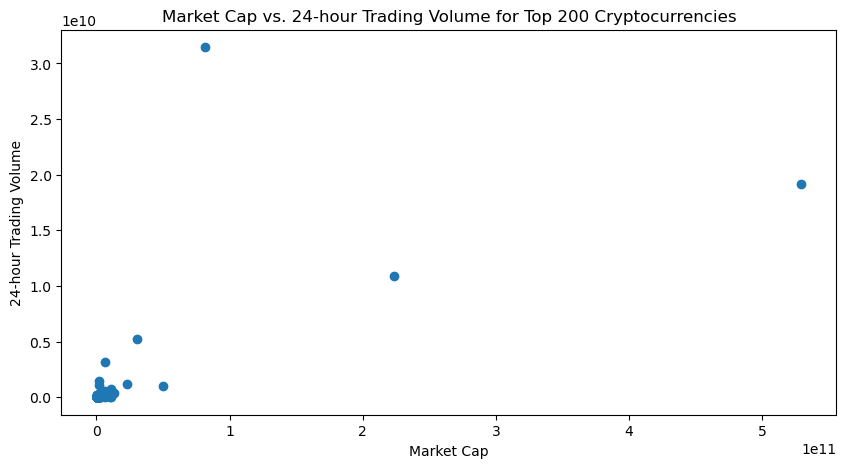

In [ ]:
top_200_market_cap = crypto.nlargest(200, 'Market Cap')
plt.figure(figsize=(10, 5))
plt.scatter(top_200_market_cap['Market Cap'], top_200_market_cap['Volume in Currency (24Hr)'])
plt.xlabel('Market Cap')
plt.ylabel('24-hour Trading Volume')
plt.title('Market Cap vs. 24-hour Trading Volume for Top 200 Cryptocurrencies')
plt.show()

6. Relationship between 24 hour trading volume and change percentage

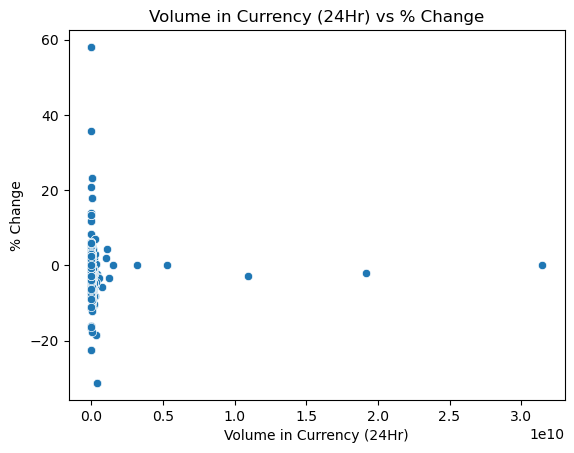

In [ ]:
volume=crypto['Volume in Currency (24Hr)']
percent_change=crypto['% Change']
sns.scatterplot(x=volume,y=percent_change)
plt.xlabel('Volume in Currency (24Hr)')
plt.ylabel('% Change')
plt.title('Volume in Currency (24Hr) vs % Change')
plt.show()